In [11]:
import yfinance as yf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

In [12]:
sp100_url = "https://en.wikipedia.org/wiki/S%26P_100"
sp100_table = pd.read_html(sp100_url)
tickers = sp100_table[2]['Symbol'].tolist()

#Time range here
start_date = "2023-12-31"
end_date = "2024-12-31"

In [13]:
sp100_data = {}
for ticker in tickers:
    try:
        stock = yf.Ticker(ticker)
        hist = stock.history(start=start_date, end=end_date, interval="1d")
        sp100_data[ticker] = hist
    except Exception as e:
        print(f"Error fetching data for {ticker}: {e}")

$BRK.B: possibly delisted; no timezone found


In [14]:
combined_data = pd.concat(sp100_data, names=["Ticker", "Date"])
combined_data.to_csv("sp100_daily_combined.csv")

C:\Users\hughp\AppData\Local\Temp\ipykernel_37676\2558842558.py:1: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  combined_data = pd.concat(sp100_data, names=["Ticker", "Date"])


In [15]:
df = pd.read_csv("sp100_daily_combined.csv")
df.head()

,Ticker,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Adj Close
0,AAPL,2024-01-02 00:00:00-05:00,186.033057,187.315366,182.792518,184.532074,82488700.0,0.0,0.0,NaN
1,AAPL,2024-01-03 00:00:00-05:00,183.120571,184.770668,182.335277,183.150391,58414500.0,0.0,0.0,NaN
2,AAPL,2024-01-04 00:00:00-05:00,181.062899,181.997291,179.800489,180.824341,71983600.0,0.0,0.0,NaN
3,AAPL,2024-01-05 00:00:00-05:00,180.903888,181.669281,179.094742,180.098709,62303300.0,0.0,0.0,NaN
4,AAPL,2024-01-08 00:00:00-05:00,181.003268,184.492330,180.416793,184.452560,59144500.0,0.0,0.0,NaN


In [19]:
adj_close = combined_data["Close"].unstack(level=0)  # Pivot by ticker
adj_close["SP100_EqualWeight"] = adj_close.mean(axis=1)

In [18]:
print(adj_close) # closes of each stock per day
#Our main data for this project *muscle emoji*

Ticker                           AAPL        ABBV         ABT         ACN  \
Date                                                                        
2024-01-02 00:00:00-05:00  184.532074  152.743423  107.138481  341.431366   
2024-01-03 00:00:00-05:00  183.150391  153.355042  106.816628  332.573761   
2024-01-04 00:00:00-05:00  180.824341  154.310776  108.240585  331.756866   
2024-01-05 00:00:00-05:00  180.098709  154.960678  108.065033  331.294312   
2024-01-08 00:00:00-05:00  184.452560  154.282104  109.625534  334.965271   
...                               ...         ...         ...         ...   
2024-12-23 00:00:00-05:00  254.989655  176.723465  113.713264  358.769989   
2024-12-24 00:00:00-05:00  257.916443  178.318420  114.160919  361.630005   
2024-12-26 00:00:00-05:00  258.735504  177.525894  114.668251  360.429993   
2024-12-27 00:00:00-05:00  255.309296  176.347015  114.389717  356.179993   
2024-12-30 00:00:00-05:00  251.923019  174.553925  112.211151  352.489990   

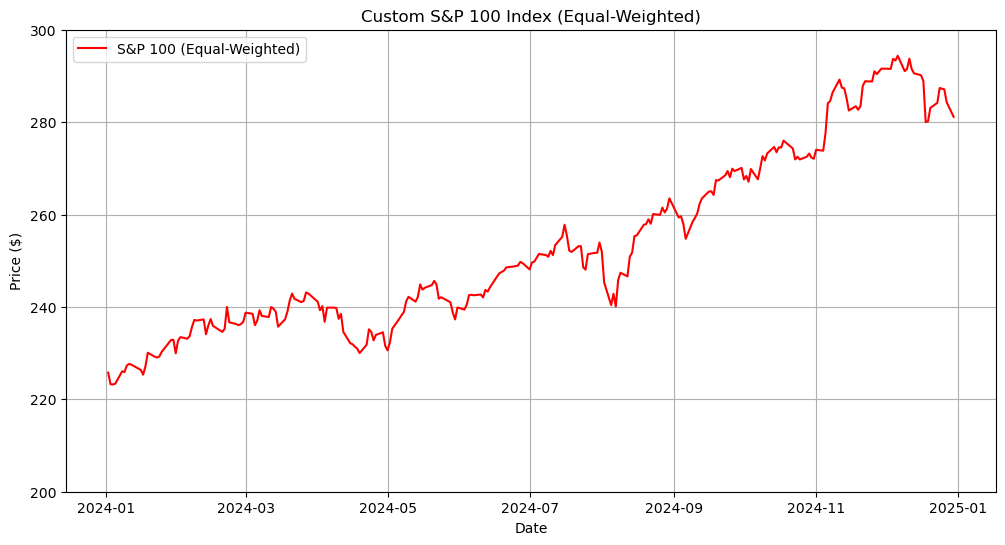

In [25]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=adj_close, x=adj_close.index, y="SP100_EqualWeight", 
             label="S&P 100 (Equal-Weighted)", color="red")
plt.title("Custom S&P 100 Index (Equal-Weighted)")
plt.ylabel("Price ($)")
plt.grid(True)
plt.ylim(200,300)
plt.show()